<a href="https://colab.research.google.com/github/RocioCelesteMunoz/grupo_16_android/blob/main/grupo_16_android/HPC/Ejercicios/Cuaderno_1_grupo16_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 Introduccion**

En este ejercicio vamos a aplicarle el filtro de brillo a una imagen dada. Para realizar esto, lo que se hace es incrementarlo multiplicando los 3 componentes RGB por 1.5, y haciendo uso de la funcion min(), comparar el valor 255 contra el resultante de la multiplicacion de cada componente de RGB. Si el mismo supera el valor 255 el valor final del componente sera 255, caso contrario sera el valor resultado de multiplicar el componente por 1.5.

La funcion a utilizar es:
             **<center> `min(255, pixelR * 1.5)`<center>**







# **2 Armado del ambiente**

Para CPU no es necesario ejecuciones previas.

Para GPU instalamos en el cuaderno el módulo CUDA de Python.

In [1]:
!pip install pycuda

     |████████████████████████████████| 1.7 MB 5.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 75 kB 4.2 MB/s 
     |████████████████████████████████| 66 kB 4.8 MB/s 
  Created wheel for pycuda: filename=pycuda-2021.1-cp37-cp37m-linux_x86_64.whl size=627577 sha256=98f60fee29d6c8f1a49f786b3c2acf622082488e3df1a1fca965f0ff5ae1a35e
  Stored in directory: /root/.cache/pip/wheels/c4/ef/49/dc6a5feb8d980b37c83d465ecab24949a6aa19458522a9e001
  Created wheel for pytools: filename=pytools-2021.2.9-py2.py3-none-any.whl size=62370 sha256=301712eb00a0862bfa13e18b274b1619d257f58d2af0c59fffe56f1fbd2d32c8
  Stored in directory: /root/.cache/pip/wheels/41/b9/6e/94bb014f6484b15ec77e7877f3a227609481ffd98db364504d
Successfully built pycuda pytools


Debemos especificar la URL de la imagen a la cual vamos a aplicarle el filtro

In [2]:
#@title # 2.1 Parámetros de ejecución
#@markdown ---
#@markdown ### Especifique la URL de la imagen:
url_imagen = "https://github.com/RocioCelesteMunoz/grupo_16_android/blob/d4b691016d2198dccbc849f47e5f65acfbab0670/HPC/Imagenes/20190516-145310-fachada.jpg?raw=true" #@param {type:"string"}

#@markdown ---

!wget {url_imagen} -O imagen.jpg

--2021-11-24 18:51:38--  https://github.com/RocioCelesteMunoz/grupo_16_android/blob/d4b691016d2198dccbc849f47e5f65acfbab0670/HPC/Imagenes/20190516-145310-fachada.jpg?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/RocioCelesteMunoz/grupo_16_android/raw/d4b691016d2198dccbc849f47e5f65acfbab0670/HPC/Imagenes/20190516-145310-fachada.jpg [following]
--2021-11-24 18:51:39--  https://github.com/RocioCelesteMunoz/grupo_16_android/raw/d4b691016d2198dccbc849f47e5f65acfbab0670/HPC/Imagenes/20190516-145310-fachada.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/RocioCelesteMunoz/grupo_16_android/d4b691016d2198dccbc849f47e5f65acfbab0670/HPC/Imagenes/20190516-145310-fachada.jpg [following]
--2021-11-24 18:51:39--  https://raw.githubusercontent.com

# **3 Desarrollo**

En CPU

Imagen del filtro: imagen.jpg -RGB- [936, 1404]
Tiempo de conversión de imagen: 17488.233 [ms]
Tiempo Total: 17622.448 [ms]


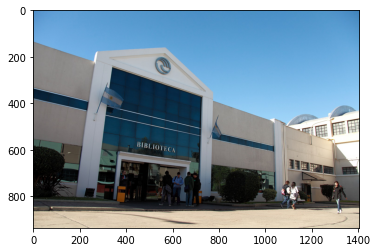

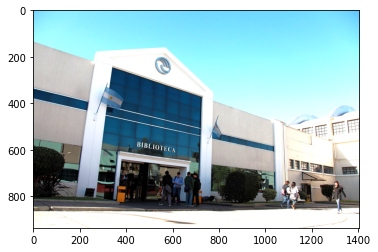

In [3]:
try:

  from datetime import datetime

  tiempo_total = datetime.now()

  import  matplotlib.pyplot as plt
  import numpy
  from PIL import Image 

  

  # --------------------------------------------
  # Definición de función que transforma el tiempo en  milisegundos 
  tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
  # --------------------------------------------


  img_nombre = 'imagen.jpg'
  image = Image.open( img_nombre ) 
    
  # Obtenemos las proporciones de la imagen. 
  img_alto, img_ancho = image.size 

  # Convertimos la imagen comprimida a array.
  img_pic_cpu = numpy.asarray(image)

  # Generamos el array resultado (3 pixeles usa RGB * (el tamaño del array)).
  img_picR_cpu = numpy.empty_like( img_pic_cpu)

  # Mostramos los atributos de la imagen
  print("Imagen del filtro: " + img_nombre + " -" + image.mode + "- [" + str(img_ancho) + ", " + str(img_alto ) + "]" )  


  # Mostramos la imagen original
  plt.figure()
  imgplot=plt.imshow( img_pic_cpu )

  tiempo_img = datetime.now()

  # Convertimos la imagen con el filtro de brillo.
  for y  in range( 0, img_alto ):
    for x in range( 0, img_ancho ):
        pixel_R, pixel_G, pixel_B = img_pic_cpu[x][y]
        pixel_complemento_R = (min(255, pixel_R*1.5))
        pixel_complemento_G = (min(255, pixel_G*1.5))
        pixel_complemento_B = (min(255, pixel_B*1.5))
        img_picR_cpu[x][y] = [pixel_complemento_R, pixel_complemento_G, pixel_complemento_B]

  tiempo_img = datetime.now() - tiempo_img

  # Mostramos la imagen luego de aplicarle el filtro.
  plt.figure()
  imgplot = plt.imshow( img_picR_cpu )

  tiempo_total = datetime.now() - tiempo_total

  print( "Tiempo de conversión de imagen:", tiempo_en_ms( tiempo_img   ), "[ms]" )
  print( "Tiempo Total:",                   tiempo_en_ms( tiempo_total ), "[ms]" )
except Exception as e:
  print("Tipo de excepcion: ", type(e))
  print("Detalles:: ", e.args)

En GPU

Imagen del filtro: imagen.jpg -RGB- [936, 1404]
Thread: [ 32 , 32  ], Bloque : [ 30 , 44 ]
Total de Thread: [ 960 , 1408  ]  =  1351680
Tiempo TOTAL:  112.184 [ms]
Tiempo GPU  :  0.095 [ms]


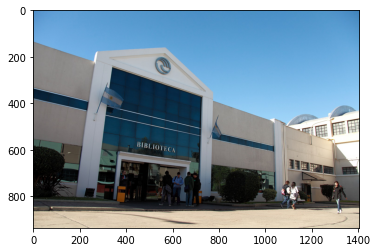

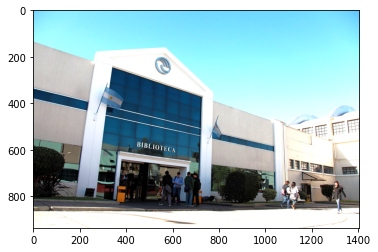

In [102]:
try:
  %matplotlib inline
  from datetime import datetime
  tiempo_total = datetime.now()

  import matplotlib.pyplot as plt
  import numpy
  from PIL import Image 
  import pycuda.driver as cuda
  import pycuda.autoinit
  from pycuda.compiler import SourceModule

  # --------------------------------------------
#@title 3.1 Dimensiones de los hilos

  hilo_x =   16#@param {type: "number"}
  hilo_y =   16#@param {type: "number"}

# --------------------------------------------

  # --------------------------------------------
  # Definición de función que transforma el tiempo en  milisegundos 
  tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
  # --------------------------------------------

  img_nombre = 'imagen.jpg'
  image = Image.open( img_nombre ) 
    
  # summarize some details about the image 
  img_alto, img_ancho = image.size

  # Convierto la imagen comprimida en JPEG/PNG a array
  img_O_cpu = numpy.asarray(image)
  img_O_cpu = img_O_cpu.astype( numpy.int32() )
  img_R_cpu = numpy.empty_like( img_O_cpu)

  # Reservo los 2 vectores en GPU(3 pixeles usa RGB * (el tamaño del array))
  img_O_gpu = cuda.mem_alloc( img_O_cpu.nbytes )
  img_R_gpu = cuda.mem_alloc( img_R_cpu.nbytes )

  # GPU - Copio la memoria al GPU. 
  cuda.memcpy_htod( img_O_gpu, img_O_cpu )
  cuda.memcpy_htod( img_R_gpu, img_R_cpu )

    # CPU - Defino la función kernel que ejecutará en GPU.
  module = SourceModule("""
  __global__ void kernel_img( int ancho, int alto, int *img_O, int *img_R )
  {
   // Calculo las coordenadas del Thread en dos dimensiones.
    int idx = threadIdx.x + blockIdx.x*blockDim.x;
    int idy = threadIdx.y + blockIdx.y*blockDim.y;
    float pixel_R = 0.0;
    float pixel_G = 0.0;
    float pixel_B = 0.0;
  // Verifico que los Thread, esten dentro de las dimensiones de la imagen.
  if( idx < ancho && idy < alto )
  {

    pixel_R = (float)img_O[(idx+(idy*ancho))*3    ]*1.5; 
    pixel_G = (float)img_O[((idx+(idy*ancho))*3)+1]*1.5;
    pixel_B = (float)img_O[((idx+(idy*ancho))*3)+2]*1.5;


    //Pixel
    img_R[(idx+(idy*ancho))*3  ] = (int)min(255.0,pixel_R);
    img_R[(idx+(idy*ancho))*3+1] = (int)min(255.0,pixel_G);
    img_R[(idx+(idy*ancho))*3+2] = (int)min(255.0,pixel_B);

    }
  }
  """)

  # Muestro los atributos de la imagen y como se ve antes del seudo filtro.
  print("Imagen del filtro: " + img_nombre + " -" + image.mode + "- [" + str(img_ancho) + ", " + str(img_alto ) + "]" )  

  # CPU - Genero la función kernel.
  kernel = module.get_function("kernel_img")

  tiempo_img = datetime.now()

  dim_hilo_x = hilo_x
  dim_bloque_x = numpy.int( (img_ancho+dim_hilo_x-1) / dim_hilo_x)

  dim_hilo_y = hilo_y
  dim_bloque_y = numpy.int( (img_alto+dim_hilo_y-1) / dim_hilo_y )

  print( "Thread: [", dim_hilo_x, ",", dim_hilo_y, " ], Bloque : [", dim_bloque_x, ",", dim_bloque_y, "]" )
  print( "Total de Thread: [", dim_hilo_x*dim_bloque_x, ",", dim_hilo_y*dim_bloque_y, " ]", " = ", dim_hilo_x*dim_bloque_x*dim_hilo_y*dim_bloque_y )

  tiempo_img = datetime.now()

  kernel( numpy.int32(img_ancho), numpy.int32(img_alto), img_O_gpu, img_R_gpu, block=( dim_hilo_x, dim_hilo_y, 1 ), grid=(dim_bloque_x, dim_bloque_y,1) )

  tiempo_img = datetime.now() - tiempo_img

  # GPU - Copio el resultado desde la memoria GPU.
  cuda.memcpy_dtoh( img_R_cpu, img_R_gpu )

  # Muestro la imagen Original el filtro.
  plt.figure()
  imgplot=plt.imshow( img_O_cpu )


  # Muestro la imagen luego de aplicarle el filtro.
  plt.figure()
  imgplot=plt.imshow( img_R_cpu )

  tiempo_total = datetime.now() - tiempo_total

  print("Tiempo TOTAL: ", tiempo_en_ms( tiempo_total ), "[ms]" )
  print("Tiempo GPU  : ", tiempo_en_ms( tiempo_img ), "[ms]" )
except Exception as e:
  print("Tipo de excepcion: ", type(e))
  print("Detalles:: ", e.args)

# **4 Métricas**

Comparativa de las velocidades entre CPU y GPU


|                                   | CPU            | GPU           |
|-----------------------------------|----------------|---------------|
|**Tiempo de conversión de imagen:**| 16980.468 [ms] | 0.104 [ms]    |
|**Tiempo TOTAL:**                  | 17094.608 [ms] | 139.068 [ms]  |




# **5 Conclusiones**

Con este ejercicio pudimos ver una gran diferencia en los tiempos de ejecucion secuencial contra los tiempos de ejecucion en GPU. Si bien ambos desarrollos llegan al mismo resultado, se puede notar que el tiempo de ejecucion en GPU con cuda y el uso de hilos es mucho menor que el tiempo utilizando CPU, llegando asi a la conclusion que es mucho mas conveniente en estos casos el uso de GPU. 

# **6 Bibliografia**



*   https://stackoverflow.com/questions/50937550/formula-to-increase-brightness-of-rgb
*   https://github.com/wvaliente/SOA_HPC/blob/main/Ejercicios/Prueba%202%20-%20Imagen%20-%20GPU.ipynb

